In [1]:
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
import numpy as np
import random
import pandas as pd
import seaborn as sns
from datetime import date

import matplotlib.pyplot as plt
% matplotlib inline


df = pd.read_csv('train.csv')
df.head()
df.info()


/home/smokersan/.virtualenvs/dl_frame/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 9 columns):
Name             7500 non-null object
Date of Birth    7500 non-null object
From             7500 non-null object
To               7500 non-null object
Flight Date      7500 non-null object
Flight Time      7500 non-null object
Booking Date     7500 non-null object
Class            7500 non-null object
Fare             7500 non-null float64
dtypes: float64(1), object(8)
memory usage: 527.4+ KB


In [39]:
# def processing(df):
df_train = df.set_index('Name')
# df_train.info()
x_train = df_train.drop(['Fare'], 1)

test = pd.read_csv('test.csv')
test = test.drop(['Name'],1)
x_train['Date of Birth'] = pd.to_datetime(x_train['Date of Birth'], format='%Y-%m-%d')
x_train['Booking Date'] = pd.to_datetime(x_train['Booking Date'], format='%Y-%m-%d')
x_train['Flight Date'] = pd.to_datetime(x_train['Flight Date'], format='%Y-%m-%d')

test['Date of Birth'] = pd.to_datetime(test['Date of Birth'], format='%Y-%m-%d')
test['Booking Date'] = pd.to_datetime(test['Booking Date'], format='%Y-%m-%d')
test['Flight Date'] = pd.to_datetime(test['Flight Date'], format='%Y-%m-%d')


x_train['Age'] = x_train['Flight Date'].subtract(x_train['Date of Birth']).apply(lambda timedelta: int(timedelta.days)/365)
x_train['Booking'] = x_train['Flight Date'].subtract(x_train['Booking Date']).apply(lambda timedelta: int(timedelta.days))
x_train.dtypes


test['Age'] = test['Flight Date'].subtract(test['Date of Birth']).apply(lambda timedelta: int(timedelta.days)/365)
test['Booking'] = test['Flight Date'].subtract(test['Booking Date']).apply(lambda timedelta: int(timedelta.days))

x_train = x_train.drop(['Booking Date','Date of Birth'],axis=1)
test = test.drop(['Booking Date','Date of Birth'],axis=1)


categorical_features = ['From','To','Class']
for feat in categorical_features:
    enc = LabelEncoder()
    x_train[feat] = enc.fit_transform(x_train[feat])
    test[feat] = enc.fit_transform(test[feat])

pd.DataFrame({"year": x_train['Flight Date'].dt.year,
              "month":x_train['Flight Date'].dt.month,
              "day": x_train['Flight Date'].dt.day,
             })

x_train['year'] = pd.DataFrame({"year": x_train['Flight Date'].dt.year})
x_train['month'] = pd.DataFrame({"month": x_train['Flight Date'].dt.month})
x_train['day'] = pd.DataFrame({"day": x_train['Flight Date'].dt.day})
x_train['Flight Time'] = pd.to_datetime(x_train['Flight Time'],format= "%H:%M") 
x_train['hour'] = pd.DataFrame({"hour": x_train['Flight Time'].dt.hour})
x_train['minute'] = pd.DataFrame({"minute": x_train['Flight Time'].dt.minute})

test['year'] = pd.DataFrame({"year": test['Flight Date'].dt.year})
test['month'] = pd.DataFrame({"month": test['Flight Date'].dt.month})
test['day'] = pd.DataFrame({"day": test['Flight Date'].dt.day})
test['Flight Time'] = pd.to_datetime(test['Flight Time'],format= "%H:%M") 
test['hour'] = pd.DataFrame({"hour": test['Flight Time'].dt.hour})
test['minute'] = pd.DataFrame({"minute": test['Flight Time'].dt.minute})

x_train = x_train.drop(['Flight Time','Flight Date'],axis=1)
test = test.drop(['Flight Time','Flight Date'],axis=1)
y =df_train['Fare']
print(x_train.dtypes)
train_x, test_x, train_y, test_y = train_test_split(x_train, y, train_size=.75,random_state=42)

# test.dtypes

# 0 -business 1- economy
# 5 -mumbai 4 -lucknow, 3 -kolkata, 1 -delhi,0-chennai
# print(enc.inverse_transform(test['Class']))
# x_train['From'] = enc.fit_transform(x_train['From'])
# for value in x_train['Name']:
#     print value

From       int64
To         int64
Class      int64
Age        int64
Booking    int64
year       int64
month      int64
day        int64
hour       int64
minute     int64
dtype: object


In [42]:
from keras.models import Sequential
from keras.layers import Dense

model_id =2
if model_id==1 :
    model = Sequential()
    model.add(Dense(600, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(400, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
if model_id==2 :
    n_features = 10
    model = Sequential()
    model.add(Dense(2*n_features, input_dim=n_features, kernel_initializer='normal', activation='relu'))
    model.add(Dense(n_features//2, input_dim=2*n_features, kernel_initializer='normal', activation='relu'))
    model.add(Dense(n_features, input_dim=n_features//2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')




In [47]:
model.load_weights("model_12.h5")
modeldata = model.fit(train_x, train_y, epochs=500, batch_size=50)
model.save("model_22.h5")
results = model.evaluate(test_x, test_y, verbose=1)
#24206925.429333333 for first500
print(" MSE: ", mean_squared_error(test_y, pred_y))

Epoch 1/500
5625/5625 [==============================] - 1s 93us/step - loss: 21891188.8489
Epoch 2/500
5625/5625 [==============================] - 0s 87us/step - loss: 21993862.5556
Epoch 3/500
5625/5625 [==============================] - 0s 87us/step - loss: 21860557.1156
Epoch 4/500
5625/5625 [==============================] - 0s 81us/step - loss: 22072885.0667
Epoch 5/500
5625/5625 [==============================] - 0s 87us/step - loss: 21972683.4844
Epoch 6/500
5625/5625 [==============================] - 0s 80us/step - loss: 22100263.8444
Epoch 7/500
5625/5625 [==============================] - 0s 83us/step - loss: 22033355.8267
Epoch 8/500
5625/5625 [==============================] - 0s 82us/step - loss: 21949456.2667
Epoch 9/500
5625/5625 [==============================] - 0s 86us/step - loss: 22155958.9711
Epoch 10/500
5625/5625 [==============================] - 0s 81us/step - loss: 22023263.5022
Epoch 11/500
5625/5625 [==============================] - 0s 87us/step - loss: 

5625/5625 [==============================] - 0s 78us/step - loss: 21915106.7556
Epoch 90/500
5625/5625 [==============================] - 0s 79us/step - loss: 22022948.9733
Epoch 91/500
5625/5625 [==============================] - 0s 74us/step - loss: 22039672.8711
Epoch 92/500
5625/5625 [==============================] - 0s 81us/step - loss: 21943444.6756
Epoch 93/500
5625/5625 [==============================] - 1s 102us/step - loss: 21897501.9822
Epoch 94/500
5625/5625 [==============================] - 1s 130us/step - loss: 22054207.3778
Epoch 95/500
5625/5625 [==============================] - 0s 89us/step - loss: 21987443.0800
Epoch 96/500
5625/5625 [==============================] - 1s 91us/step - loss: 22356219.4533
Epoch 97/500
5625/5625 [==============================] - 0s 83us/step - loss: 22117199.3556
Epoch 98/500
5625/5625 [==============================] - 0s 86us/step - loss: 22314972.2133
Epoch 99/500
5625/5625 [==============================] - 0s 85us/step - loss: 22

5625/5625 [==============================] - 1s 109us/step - loss: 21901280.1022
Epoch 177/500
5625/5625 [==============================] - 1s 106us/step - loss: 22130436.6133
Epoch 178/500
5625/5625 [==============================] - 1s 100us/step - loss: 21901649.2711
Epoch 179/500
5625/5625 [==============================] - 1s 99us/step - loss: 22149531.4133
Epoch 180/500
5625/5625 [==============================] - 1s 90us/step - loss: 22107519.5244
Epoch 181/500
5625/5625 [==============================] - 1s 90us/step - loss: 22076975.8933
Epoch 182/500
5625/5625 [==============================] - 0s 84us/step - loss: 22068113.5689
Epoch 183/500
5625/5625 [==============================] - 1s 107us/step - loss: 21898756.5600
Epoch 184/500
5625/5625 [==============================] - 0s 87us/step - loss: 21873404.0889
Epoch 185/500
5625/5625 [==============================] - 1s 89us/step - loss: 22085787.6667
Epoch 186/500
5625/5625 [==============================] - 0s 81us/ste

5625/5625 [==============================] - 1s 90us/step - loss: 21924210.2667
Epoch 264/500
5625/5625 [==============================] - 1s 111us/step - loss: 21939546.2089
Epoch 265/500
5625/5625 [==============================] - 1s 117us/step - loss: 22001192.5333
Epoch 266/500
5625/5625 [==============================] - 1s 101us/step - loss: 21962905.9600
Epoch 267/500
5625/5625 [==============================] - 1s 91us/step - loss: 22001714.1867
Epoch 268/500
5625/5625 [==============================] - 0s 79us/step - loss: 21999689.7378
Epoch 269/500
5625/5625 [==============================] - 0s 82us/step - loss: 21908879.9333
Epoch 270/500
5625/5625 [==============================] - 0s 78us/step - loss: 22271415.4711
Epoch 271/500
5625/5625 [==============================] - 0s 83us/step - loss: 21961349.1600
Epoch 272/500
5625/5625 [==============================] - 1s 112us/step - loss: 21979130.2133
Epoch 273/500
5625/5625 [==============================] - 0s 88us/ste

5625/5625 [==============================] - 0s 74us/step - loss: 22042275.7333
Epoch 351/500
5625/5625 [==============================] - 0s 74us/step - loss: 22149424.8133
Epoch 352/500
5625/5625 [==============================] - 0s 74us/step - loss: 21965849.4311
Epoch 353/500
5625/5625 [==============================] - 0s 70us/step - loss: 22047930.1156
Epoch 354/500
5625/5625 [==============================] - 0s 80us/step - loss: 22014564.0756
Epoch 355/500
5625/5625 [==============================] - 0s 86us/step - loss: 21959515.8533
Epoch 356/500
5625/5625 [==============================] - 0s 63us/step - loss: 21984487.8756
Epoch 357/500
5625/5625 [==============================] - 0s 85us/step - loss: 21959448.4533
Epoch 358/500
5625/5625 [==============================] - 0s 67us/step - loss: 22031561.5289
Epoch 359/500
5625/5625 [==============================] - 0s 62us/step - loss: 22220883.7111
Epoch 360/500
5625/5625 [==============================] - 0s 64us/step - 

5625/5625 [==============================] - 0s 86us/step - loss: 22037882.6578
Epoch 438/500
5625/5625 [==============================] - 0s 76us/step - loss: 22092422.7644
Epoch 439/500
5625/5625 [==============================] - 0s 63us/step - loss: 22009071.2489
Epoch 440/500
5625/5625 [==============================] - 0s 63us/step - loss: 22123163.1644
Epoch 441/500
5625/5625 [==============================] - 0s 72us/step - loss: 21987535.9156
Epoch 442/500
5625/5625 [==============================] - 0s 81us/step - loss: 21859344.6978
Epoch 443/500
5625/5625 [==============================] - 0s 83us/step - loss: 22073228.4667
Epoch 444/500
5625/5625 [==============================] - 0s 77us/step - loss: 21970651.0667
Epoch 445/500
5625/5625 [==============================] - 0s 70us/step - loss: 22121951.6000
Epoch 446/500
5625/5625 [==============================] - 0s 74us/step - loss: 21942880.9067
Epoch 447/500
5625/5625 [==============================] - 0s 85us/step - 

In [14]:
model.load_weights("model_1.h5")
modeldata = model.fit(train_x, train_y, epochs=500, batch_size=100)
model.save("model_2.h5")


Epoch 1/500
5625/5625 [==============================] - 0s 74us/step - loss: 19680399.9378
Epoch 2/500
5625/5625 [==============================] - 0s 78us/step - loss: 20110237.8844
Epoch 3/500
5625/5625 [==============================] - 0s 80us/step - loss: 19875358.8844
Epoch 4/500
5625/5625 [==============================] - 0s 80us/step - loss: 20040812.7867
Epoch 5/500
5625/5625 [==============================] - 0s 77us/step - loss: 19877278.7022
Epoch 6/500
5625/5625 [==============================] - 0s 73us/step - loss: 19941208.9867
Epoch 7/500
5625/5625 [==============================] - 0s 73us/step - loss: 19949120.0089
Epoch 8/500
5625/5625 [==============================] - 0s 75us/step - loss: 19848489.8222
Epoch 9/500
5625/5625 [==============================] - 0s 76us/step - loss: 19610226.3467
Epoch 10/500
5625/5625 [==============================] - 0s 77us/step - loss: 19689977.7022
Epoch 11/500
5625/5625 [==============================] - 0s 84us/step - loss: 

5625/5625 [==============================] - 0s 71us/step - loss: 19836853.1156
Epoch 90/500
5625/5625 [==============================] - 0s 73us/step - loss: 19885360.7511
Epoch 91/500
5625/5625 [==============================] - 0s 71us/step - loss: 19585036.5244
Epoch 92/500
5625/5625 [==============================] - 0s 73us/step - loss: 19500201.9822
Epoch 93/500
5625/5625 [==============================] - 0s 71us/step - loss: 19590601.7956
Epoch 94/500
5625/5625 [==============================] - 0s 74us/step - loss: 19393620.5422
Epoch 95/500
5625/5625 [==============================] - 0s 77us/step - loss: 19580208.6667
Epoch 96/500
5625/5625 [==============================] - 0s 71us/step - loss: 19769431.3867
Epoch 97/500
5625/5625 [==============================] - 0s 73us/step - loss: 19615491.6178
Epoch 98/500
5625/5625 [==============================] - 0s 71us/step - loss: 19654397.6533
Epoch 99/500
5625/5625 [==============================] - 0s 75us/step - loss: 1966

5625/5625 [==============================] - 0s 80us/step - loss: 19440839.0844
Epoch 177/500
5625/5625 [==============================] - 0s 78us/step - loss: 19777146.1111
Epoch 178/500
5625/5625 [==============================] - 0s 80us/step - loss: 19412714.6667
Epoch 179/500
5625/5625 [==============================] - 0s 68us/step - loss: 19422744.5689
Epoch 180/500
5625/5625 [==============================] - 0s 76us/step - loss: 19501107.8756
Epoch 181/500
5625/5625 [==============================] - 0s 76us/step - loss: 19704876.8178
Epoch 182/500
5625/5625 [==============================] - 0s 84us/step - loss: 19363499.0667
Epoch 183/500
5625/5625 [==============================] - 0s 86us/step - loss: 19708215.5022
Epoch 184/500
5625/5625 [==============================] - 0s 87us/step - loss: 19517861.1822
Epoch 185/500
5625/5625 [==============================] - 0s 86us/step - loss: 19602779.9556
Epoch 186/500
5625/5625 [==============================] - 0s 76us/step - 

5625/5625 [==============================] - 0s 63us/step - loss: 19468578.9689
Epoch 264/500
5625/5625 [==============================] - 0s 63us/step - loss: 19674814.8267
Epoch 265/500
5625/5625 [==============================] - 0s 65us/step - loss: 19268883.3067
Epoch 266/500
5625/5625 [==============================] - 0s 60us/step - loss: 19231188.3822
Epoch 267/500
5625/5625 [==============================] - 0s 60us/step - loss: 19363549.3244
Epoch 268/500
5625/5625 [==============================] - 0s 73us/step - loss: 19310501.3689
Epoch 269/500
5625/5625 [==============================] - 0s 61us/step - loss: 19156173.8133
Epoch 270/500
5625/5625 [==============================] - 0s 58us/step - loss: 19597194.6489
Epoch 271/500
5625/5625 [==============================] - 0s 61us/step - loss: 19318631.1911
Epoch 272/500
5625/5625 [==============================] - 0s 59us/step - loss: 19203665.7156
Epoch 273/500
5625/5625 [==============================] - 0s 59us/step - 

5625/5625 [==============================] - 1s 98us/step - loss: 19588158.4044
Epoch 351/500
5625/5625 [==============================] - 0s 88us/step - loss: 19120341.6578
Epoch 352/500
5625/5625 [==============================] - 0s 80us/step - loss: 19373901.7511
Epoch 353/500
5625/5625 [==============================] - 0s 79us/step - loss: 19016257.1467
Epoch 354/500
5625/5625 [==============================] - 1s 97us/step - loss: 18876797.7333
Epoch 355/500
5625/5625 [==============================] - 0s 72us/step - loss: 19167477.4844
Epoch 356/500
5625/5625 [==============================] - 0s 72us/step - loss: 18943419.8978
Epoch 357/500
5625/5625 [==============================] - 0s 70us/step - loss: 19048543.6889
Epoch 358/500
5625/5625 [==============================] - 0s 73us/step - loss: 19022800.8711
Epoch 359/500
5625/5625 [==============================] - 0s 72us/step - loss: 19477308.8178
Epoch 360/500
5625/5625 [==============================] - 0s 70us/step - 

5625/5625 [==============================] - 1s 92us/step - loss: 18742927.0222
Epoch 438/500
5625/5625 [==============================] - 0s 76us/step - loss: 18814682.1511
Epoch 439/500
5625/5625 [==============================] - 0s 72us/step - loss: 18958239.6444
Epoch 440/500
5625/5625 [==============================] - 0s 87us/step - loss: 18850569.7378
Epoch 441/500
5625/5625 [==============================] - 0s 72us/step - loss: 19163473.4756
Epoch 442/500
5625/5625 [==============================] - 0s 74us/step - loss: 18818693.8689
Epoch 443/500
5625/5625 [==============================] - 0s 73us/step - loss: 18879487.7156
Epoch 444/500
5625/5625 [==============================] - 0s 71us/step - loss: 18870546.0644
Epoch 445/500
5625/5625 [==============================] - 0s 73us/step - loss: 18948579.5378
Epoch 446/500
5625/5625 [==============================] - 0s 89us/step - loss: 18818112.4622
Epoch 447/500
5625/5625 [==============================] - 0s 83us/step - 

In [44]:
results = model.evaluate(test_x, test_y, verbose=1)
#24206925.429333333 for first500
print(" MSE: ", mean_squared_error(test_y, pred_y))

1875/1875 [==============================] - 0s 86us/step
(' MSE: ', 24206925.381439123)


In [239]:
# regr_model = linear_model.Ridge(alpha=0.4)
# print(train_x)
# alphaa = [0.0001,0.1,1,10,100,1000]
alphaa = [80,82,84,86,88]
# alpha = 84
for j in alphaa:
    regr_model = linear_model.Lasso(alpha=84)
    regr_model.fit(train_x, train_y)
    pred_y = regr_model.predict(test_x)
#     print("Alpha: ",j," MAE: ", mean_absolute_error(test_y, pred_y))
    print("Alpha: ",j," MSE: ", mean_squared_error(test_y, pred_y))
#     x = [i for i in range(len(test_y))]
#     plt.scatter(x, test_y, label='test', alpha=0.5)
#     plt.scatter(x, pred_y, label='test predictions', color='red', alpha=0.2)
#     plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#                ncol=2, mode="expand", borderaxespad=0.4)
#     plt.figure(figsize=(20, 20), dpi=80)
#     plt.show()

('Alpha: ', 80, ' MSE: ', 22033117.609874375)
('Alpha: ', 82, ' MSE: ', 22033117.609874375)
('Alpha: ', 84, ' MSE: ', 22033117.609874375)
('Alpha: ', 86, ' MSE: ', 22033117.609874375)
('Alpha: ', 88, ' MSE: ', 22033117.609874375)


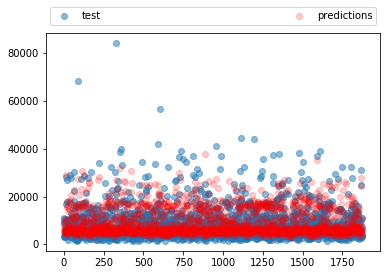

<Figure size 200x200 with 0 Axes>

In [48]:
x = [i for i in range(len(test_y))]
plt.scatter(x, test_y, label='test', alpha=0.5)
plt.scatter(x, pred_y, label='predictions', color='red', alpha=0.2)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.4)
plt.figure(figsize=(10, 10), dpi=20)
plt.show()

# print(out)

In [49]:
# test.dtypes
# df_test = pd.read_csv('results.csv')
out = model.predict(test)

output = []
for i in out:
    output.append(str(round(i, 2)) + ",")
    
with open('result1.txt', 'w') as f:
    for item in output:
        f.write("%s" % item)

